In [ ]:
# Importing libraries

import pandas as pd
import os
import json
import re
from buscoplotpy.graphics.organism_busco_barplot import organism_busco_barplot
from buscoplotpy.utils.load_busco_fulltable import load_busco_fulltable
from buscoplotpy.utils.load_json_summary import load_json_summary
from buscoplotpy.graphics.karyoplot import karyoplot

%matplotlib inline

# Insert the filename of the graph
filename = "BUSCO_barplot_results"

# Input directory
dir = "/home/lorenzo/Documenti/bioswiftanalytics_test_data/busco_tmp/tree"

directories = ['Alveolata', 'Chlorophyta', 'Euglenozoa', 'Stramenopiles']

busco_run_pattern = r'run*'

# Iterate on each superphylum group
for group in directories:
    os.chdir(dir + '/' + group)

    group_tmp = pd.DataFrame()

    # Iterate on each organism
    for organism in os.listdir():
            
        if os.path.isdir(organism):

            os.chdir(organism)

            # Create an empty dataframe
            organism_tmp = pd.DataFrame()

            # Iterate on each genome version
            for genome_version in os.listdir():

                if os.path.isdir(genome_version):
                    os.chdir(genome_version)
                    os.chdir('./busco_out')

                    for file in os.listdir():
                        if file.endswith(".json"):

                            version_tmp = load_json_summary(file)
                            version_tmp['group'] = group
                            version_tmp['organism'] = organism
                            version_tmp['version'] = genome_version

                            organism_tmp = pd.concat([organism_tmp, version_tmp], axis=0, ignore_index=True)

                    dirs = [d for d in os.listdir() if re.search(busco_run_pattern, d)]

                    os.chdir(dirs[0])

                    version_fulltable = load_busco_fulltable('full_table.tsv', group=group, organism=organism, genome_version=genome_version)

                    os.chdir('../..')
                    
                    karyoplot(karyotype_file='karyotype.tsv',
                              busco_fulltable=version_fulltable,
                              output_file='karyoplot.png',
                              title=group + ' ' + organism + ' ' + genome_version + ' karyotype',
                              chrs_limit=100,
                              dpi=300)
                    os.chdir('..')

            organism_busco_barplot(df=organism_tmp,
                                   out_path="./",
                                   filename=filename)
                
            group_tmp = pd.concat([group_tmp, organism_tmp], axis=0, ignore_index=True)

            os.chdir('..')

    organism_busco_barplot(df=group_tmp, out_path="./", filename=filename + '_all')
    organism_busco_barplot(df=group_tmp[group_tmp['complete'] >= 95.0], out_path="./", filename=filename + '_upto95')
    organism_busco_barplot(df=group_tmp[group_tmp['complete'] >= 90.0], out_path="./", filename=filename + '_upto90')
    organism_busco_barplot(df=group_tmp[group_tmp['complete'] >= 85.0], out_path="./", filename=filename + '_upto85')
    os.chdir('..')

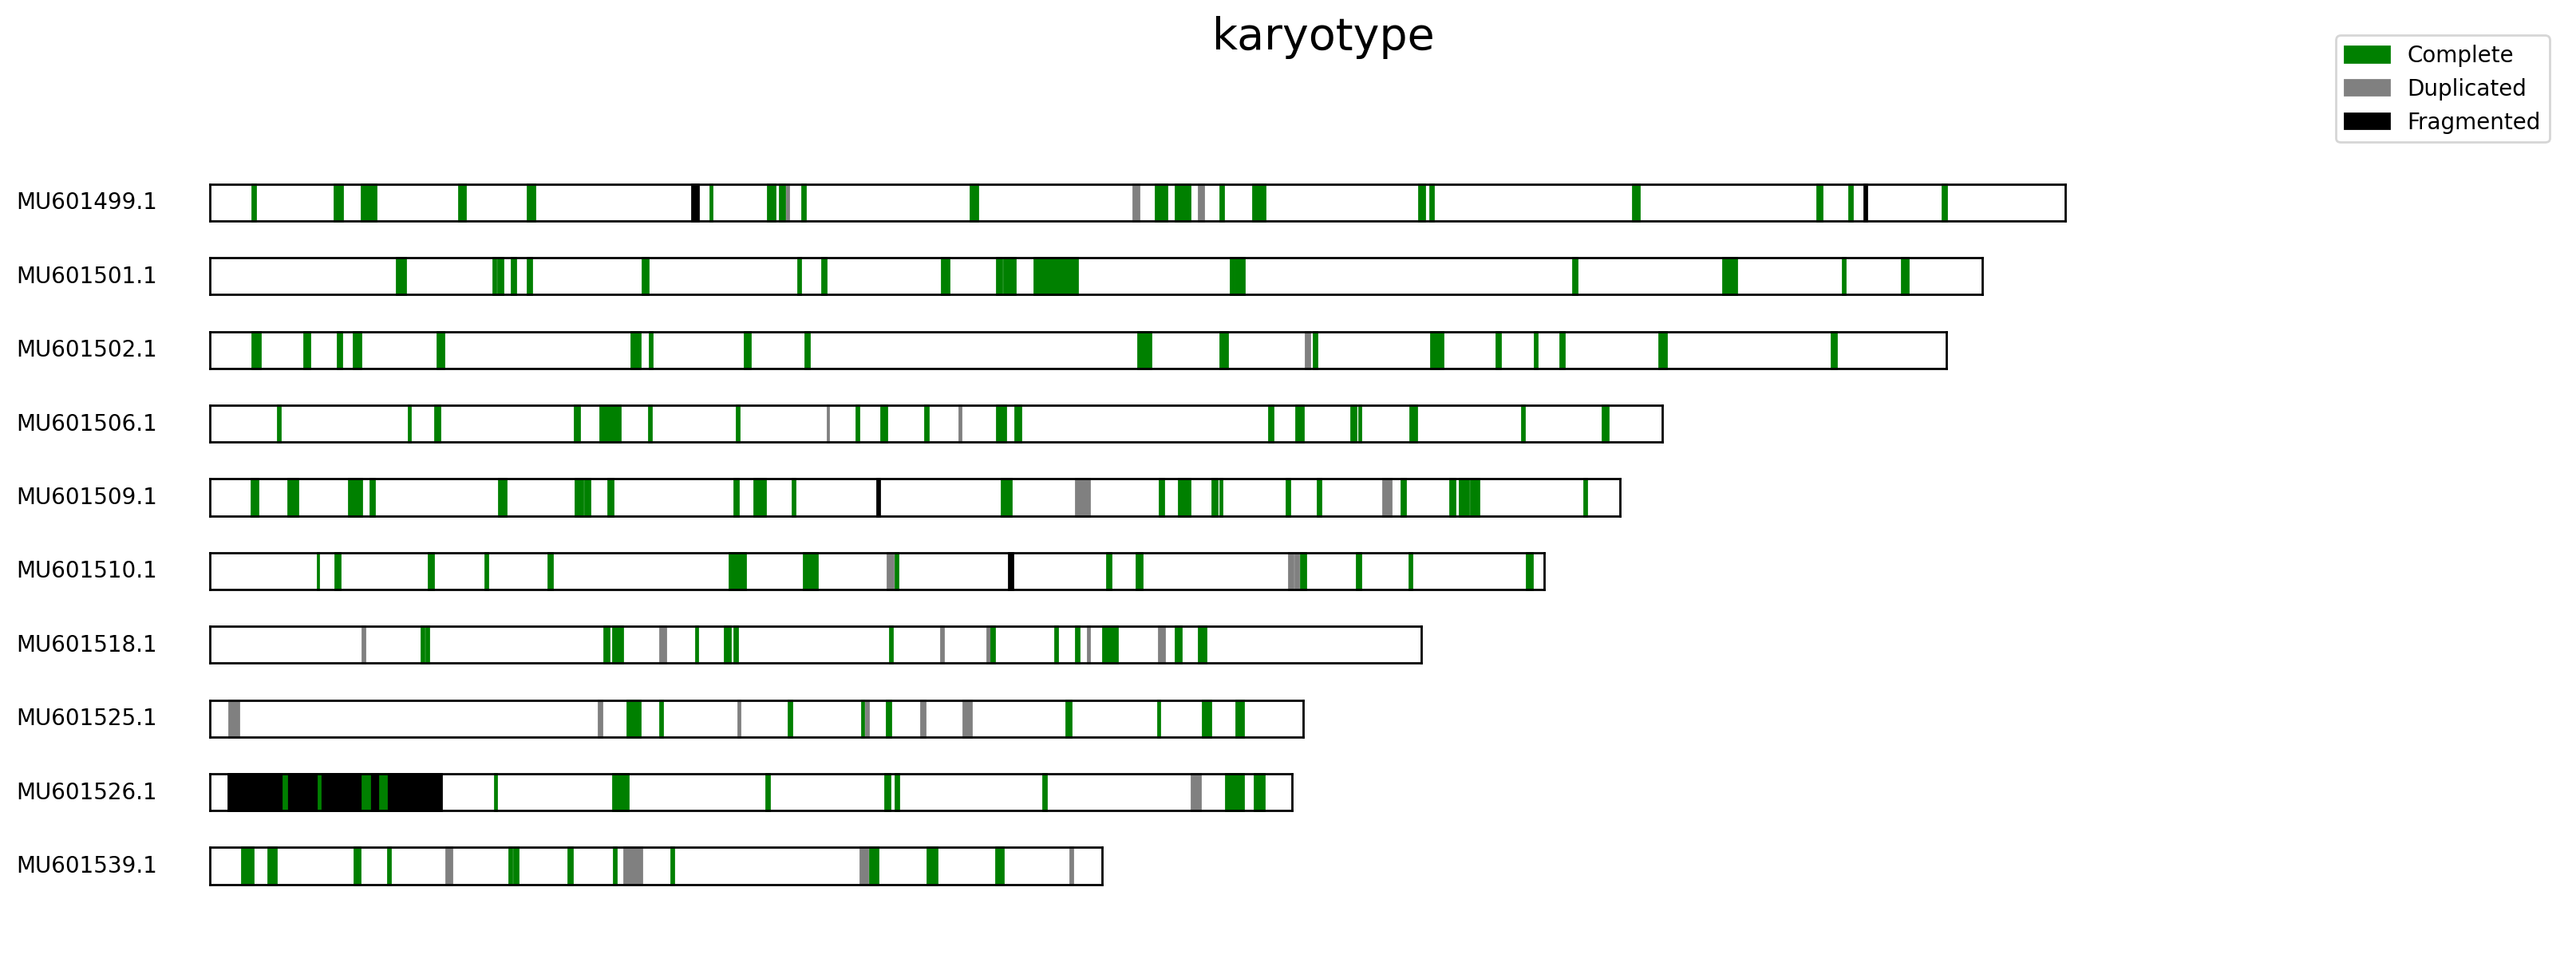

In [4]:
from buscoplotpy.graphics.karyoplot import karyoplot
from buscoplotpy.utils.load_busco_fulltable import load_busco_fulltable

full_table = load_busco_fulltable('/home/lorenzo/Documenti/bioswiftanalytics_test_data/busco_tmp/tree/Chlorophyta/Monoraphidium_minutum_1/GCA_025201885.1/busco_out/run_chlorophyta_odb10/full_table.tsv')

karyoplot(karyotype_file='/home/lorenzo/Documenti/bioswiftanalytics_test_data/busco_tmp/tree/Chlorophyta/Monoraphidium_minutum_1/GCA_025201885.1/karyotype.tsv',
          fulltable=full_table,
          title='karyotype',
          chrs_limit=10,
          dpi=200,
          plt_show=True,
          dim=3
)